In [43]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [44]:
data = pd.read_csv('Patient_records.csv')
data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


<Axes: xlabel='AccidentType'>

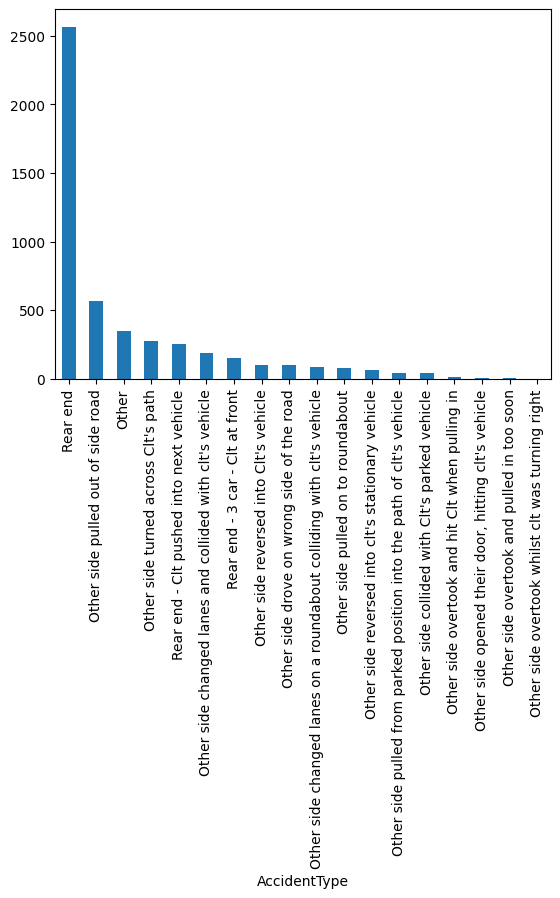

In [45]:
data['AccidentType'].value_counts().plot(kind='bar')

<Axes: xlabel='Accident Description'>

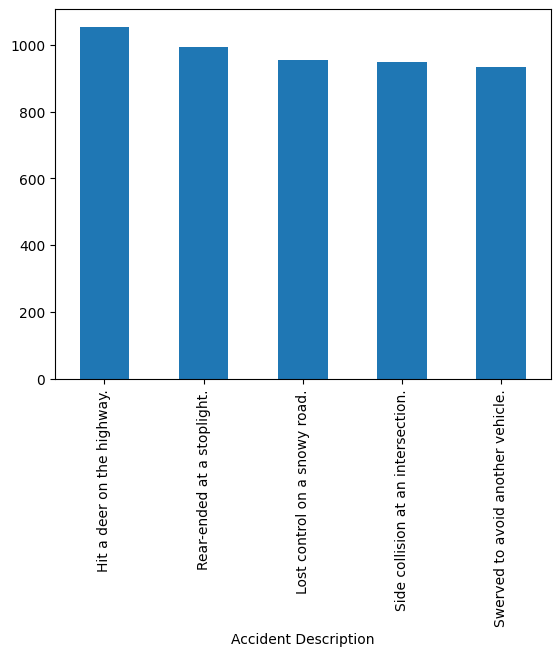

In [46]:
data['Accident Description'].value_counts().plot(kind='bar')

<Axes: xlabel='Injury Description'>

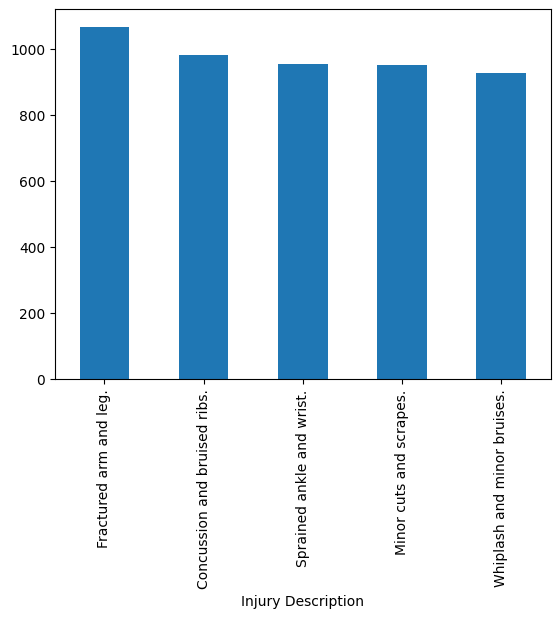

In [47]:
data['Injury Description'].value_counts().plot(kind='bar')